In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify
import datetime as dt
from datetime import timedelta

In [66]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii-Copy1.sqlite")
conn = engine.connect()

In [67]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [68]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [ ]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [70]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [71]:
engine.execute('SELECT * FROM  Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [72]:
engine.execute('SELECT * FROM  Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

INSPECTOR

In [73]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [74]:
# Viewing tables through inspector:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')


In [75]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [76]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


Exploratory Precipitation Analysis

In [77]:
# Find the most recent date in the data set.
most_recent = engine.execute('SELECT date FROM measurement ORDER BY date DESC LIMIT 1').fetchall()
most_recent

[('2017-08-23',)]

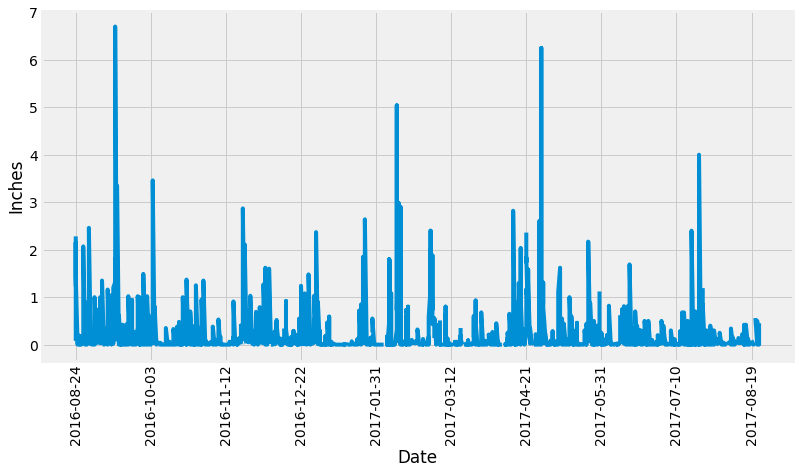

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
precip_data = engine.execute("SELECT date, prcp FROM measurement WHERE date > '2016-08-23' ORDER BY date ASC").fetchall()
precip_data

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(precip_data)
precip_data_df = precip_data_df.rename(columns = {0: 'Date', 1: 'Precip'})
precip_data_df = precip_data_df.set_index('Date')

# Sort the dataframe by date
precip_data_df.sort_index(0)

# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.figure(figsize=(12, 6))
fig.patch.set_facecolor('xkcd:white')

plt.xticks(np.arange(0, len(precip_data), 40), rotation = 90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.grid(b=True, which='major', axis='both')
plt.savefig("Images/precipitation.png") 
plt.plot(precip_data_df)
plt.show()

In [79]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df["Precip"].agg(['mean', 'median', 'var', 'std', 'sem'])

mean      0.176462
median    0.020000
var       0.211865
std       0.460288
sem       0.010254
Name: Precip, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.id)).all()
station_count

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


In [ ]:
# Create top station variable from tuple
top_station = (station_counts[0])
top_station = (top_station[0])

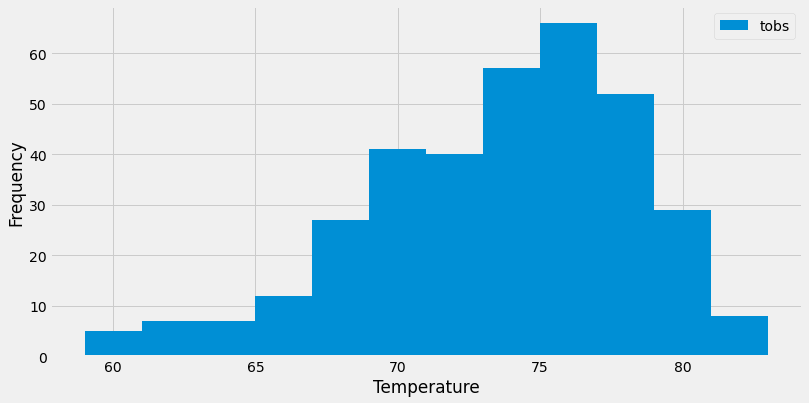

In [84]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the temperature data
temp_data = engine.execute("SELECT tobs FROM measurement WHERE date > '2016-08-23' AND station == 'USC00519281'").fetchall()
temp_data

# Save the query results as a Pandas DataFrame
temp_data_df = pd.DataFrame(temp_data)
temp_data_df = temp_data_df.rename(columns = {0: 'Temp'})

# Convert df to a list to plot histogram
temp_list = temp_data_df['Temp'].tolist()

# Plot histogram
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(temp_list, bins=12)
ax.legend(['tobs'])
plt.ylabel('Frequency')
plt.xlabel('Temperature')
ax.grid(b=True, which='major', axis='both')

# Save image of plot
plt.savefig("Images/temperature.png") 

# Display output
plt.show()

# Close session

In [ ]:
# Close Session
session.close()